In [2]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, Dense, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print(X_train.shape)

(60000, 28, 28)


In [5]:
X_train[0].min(), X_train[0].max()

(0, 255)

In [6]:
#normalize the data from 0-255 to 0-1
X_train = (X_train - 0.0) / (255.0 - 0.0)
X_test = (X_test - 0.0) / (255.0 - 0.0)
X_train[0].min(), X_train[0].max()  #checks the min and max value of in the first training image

(0.0, 1.0)

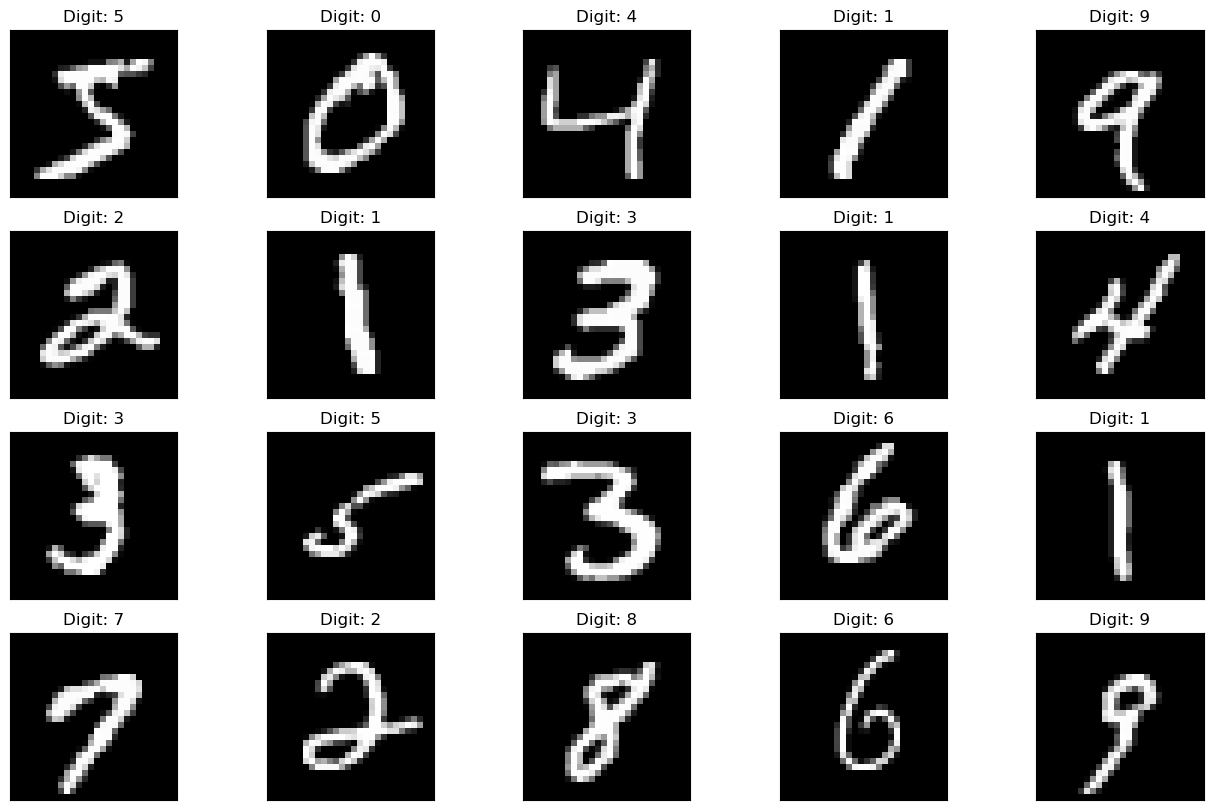

In [7]:
def plot_digit(image, digit, plt, i):  #plot_digit is a function used to create a grid of 20 images from mnist
    plt.subplot(4, 5, i + 1)   #4rows , 5columns and i+1 is the index for current subplot
    plt.imshow(image, cmap=plt.get_cmap('gray'))  #display img using grayscale colormap
    plt.title(f"Digit: {digit}")  #sets title of subplot to the digit associated with img
    plt.xticks([])         #removes the x and y ticks making the plot cleaner
    plt.yticks([])
plt.figure(figsize=(16, 10)) #creating new figure for plotting with size = 16x10inches, this setsup the canvas on which we subplot
for i in range(20):
    plot_digit(X_train[i], y_train[i], plt, i)   #for each iteration calls the plot_digit func
plt.show()

In [8]:
#reshapes the training and testing dataset to include additional dimensions, converting images from 2D to 3D
X_train = X_train.reshape((X_train.shape + (1,))) #add additional dimension size of 1 (3D-- height x width x channel) from (height x width)
X_test = X_test.reshape((X_test.shape + (1,)))    #indicating that they are 3D images with one channel(grayscale)

In [9]:
y_train[0:20] #extracts first 20 elements of y_train which are labels or target values corresponding to x_train

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

In [10]:
#defining CNN
model = Sequential([                                                #input shape = (28,28,1), 32-filters, 3x3 filter size
    Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)), #2d convolutional layer used for extracting features from images
    MaxPooling2D((2, 2)), #maxpooling layer-reduces dimension by taking max val of 2x2 window
    Flatten(),   #flatten the 2D feature map to 1D, necessary cuz next layers are dense(fully connected) which expects 1D input
    Dense(100, activation="relu"), #dense layer with 100 neurons, for learning high lev features and patterns
    Dense(10, activation="softmax") #o/p layer with 10 neurons (o/p digits 0-9)
])

In [11]:
#This sets up optimization and compilation of previously defined NN model
optimizer = SGD(learning_rate=0.01, momentum=0.9) #instance of sgd optimizer, 0.01=step size of weight during training, 0.9=hyperparameter that accelerates gradient descent in relevent direction
model.compile(  #configures the model
    optimizer=optimizer, 
    loss="sparse_categorical_crossentropy", #measures dissimilarity between true labels and predicted possibilites
    metrics=["accuracy"]   #evaluation metric accuracy, of the model
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 100)               540900    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542230 (2.07 MB)
Trainable params: 542230 (2.07 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [12]:
#used to train a neural network model
model.fit(X_train, y_train, epochs=10, batch_size=32) #32 training examples are used at once in each iteration, iteration=10

Epoch 1/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.2351 - accuracy: 0.9277
Epoch 2/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0780 - accuracy: 0.9762
Epoch 3/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0511 - accuracy: 0.9842
Epoch 4/10
1875/1875 [==============================] - 42s 23ms/step - loss: 0.0362 - accuracy: 0.9884
Epoch 5/10
1875/1875 [==============================] - 42s 23ms/step - loss: 0.0273 - accuracy: 0.9914
Epoch 6/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0199 - accuracy: 0.9937
Epoch 7/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0146 - accuracy: 0.9956
Epoch 8/10
1875/1875 [==============================] - 42s 23ms/step - loss: 0.0099 - accuracy: 0.9972
Epoch 9/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0078 - accuracy: 0.9980
Epoch 10/10
1875/1875 [==============================] - 42s 22m

1/1 [==============================] - 0s 51ms/step


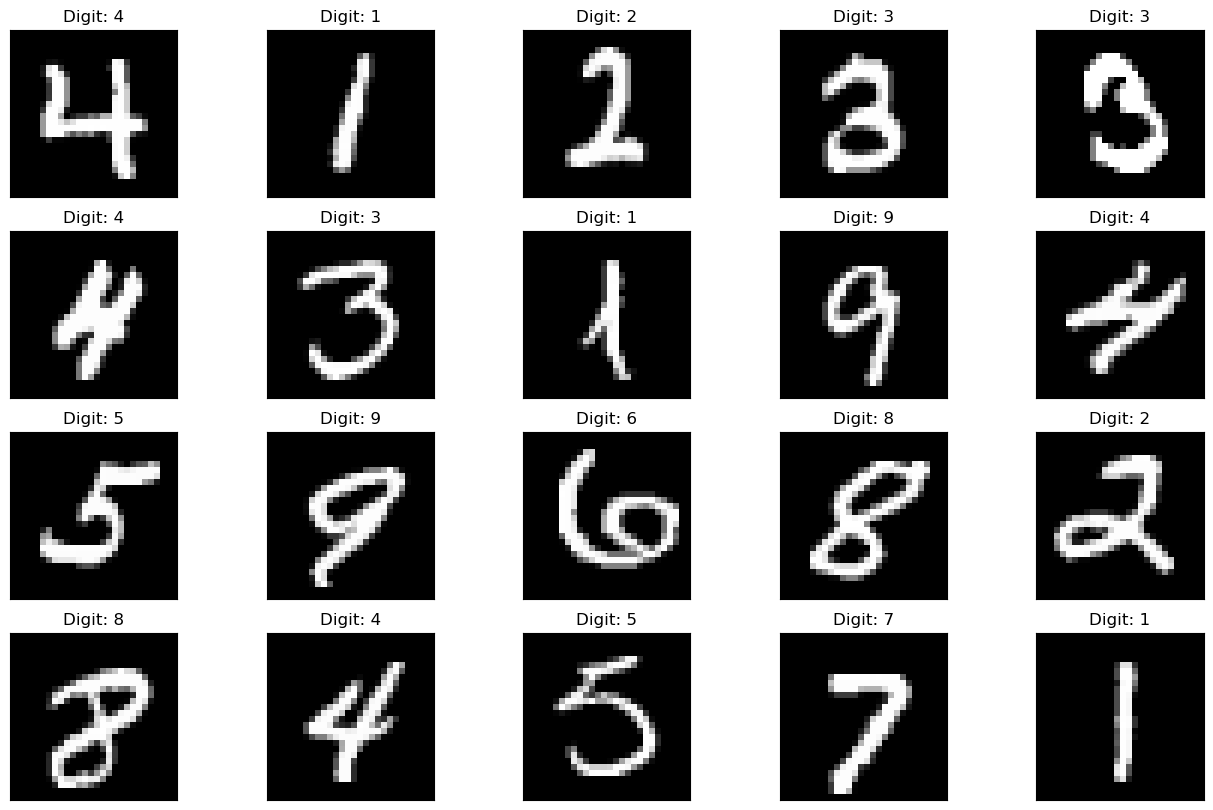

In [13]:
#visualize predictions made by trained model on random test images
plt.figure(figsize=(16, 10))
for i in range(20):
    image = random.choice(X_test).squeeze() #reduces shape of array by 1, eg-(1,28,28,1) -->(28,28),,//removes dimension with size 1, done to simplify the shape of the array
    digit = np.argmax(model.predict(image.reshape((1, 28, 28, 1)))[0], axis=-1) #effectively determines the predicted digit..more in gpt
    plot_digit(image, digit, plt, i)
plt.show()

In [14]:
predictions = np.argmax(model.predict(X_test), axis=-1)
accuracy_score(y_test, predictions) #calcs acc by comaring predicted labels(predictions) with true labels(y_test)...accuracy_score taken from sci-kit learn

313/313 [==============================] - 3s 10ms/step


0.9862

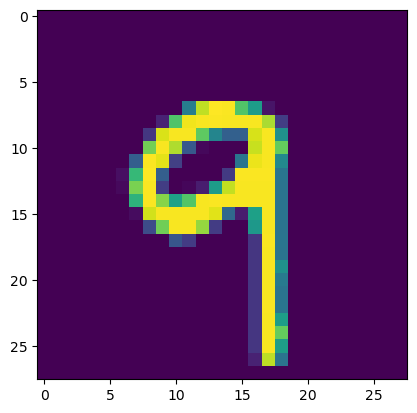

In [15]:
#taking random test img from x_test and displaying it
n=random.randint(0,9999)
plt.imshow(X_test[n])
plt.show()

In [16]:
#make the prediction on above image
predicted_value=model.predict(X_test)
print("Handwritten number in the image is= %d" %np.argmax(predicted_value[n])) #argmax funct tells which class has the maximum possibility, and determines the predicted class

313/313 [==============================] - 3s 10ms/step
Handwritten number in the image is= 9


In [17]:
#used to evaluate train models performance on test dataset and print loss and accuracy
score = model.evaluate(X_test, y_test, verbose=0) #verbose=0 means dont display any progress info during evalution
print('Test loss:', score[0]) #Test loss: 0.0296396646054
print('Test accuracy:', score[1])

Test loss: 0.04653920605778694
Test accuracy: 0.9861999750137329


In [17]:
#The implemented CNN model is giving Loss=0.04624301567673683  and 
#accuracy: 0.9872000217437744 for test mnist dataset